In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

from car_met_hast_STU import car_lik

In [2]:
df = pd.read_csv('lc_58.6272.729.B.txt')

In [3]:
df.head()

,Time,Mag,Error
0,49001.386481,-3.429,0.131
1,49021.510023,-2.959,0.235
2,49042.411285,-3.287,0.102
3,49045.486100,-1.719,1.525
4,49083.447975,-5.346,0.367


In [7]:
error_mean = df['Error'].mean()
error_mean

0.1406868131868131

In [9]:
df_filtered = df[df['Error'] <= 3*error_mean]
df_filtered.head()

,Time,Mag,Error
0,49001.386481,-3.429,0.131
1,49021.510023,-2.959,0.235
2,49042.411285,-3.287,0.102
4,49083.447975,-5.346,0.367
5,49095.399861,-3.319,0.160


In [16]:
min_time, max_time = min(df_filtered['Time']), max(df_filtered['Time'])
time_range = max_time - min_time

mean_mag = df_filtered['Mag'].mean()
sigma_mag = df_filtered['Mag'].std()

normalized = df_filtered
for index, row in normalized.iterrows():
    row['Mag'] -= mean_mag
    row['Mag'] /= sigma_mag
    row['Time'] -= min_time
    row['Time'] /= time_range

normalized.head()

,Time,Mag,Error
0,0.000000,2.132620,0.131
1,0.007907,3.443421,0.235
2,0.016120,2.528649,0.102
4,0.032244,-3.213777,0.367
5,0.036941,2.439403,0.160


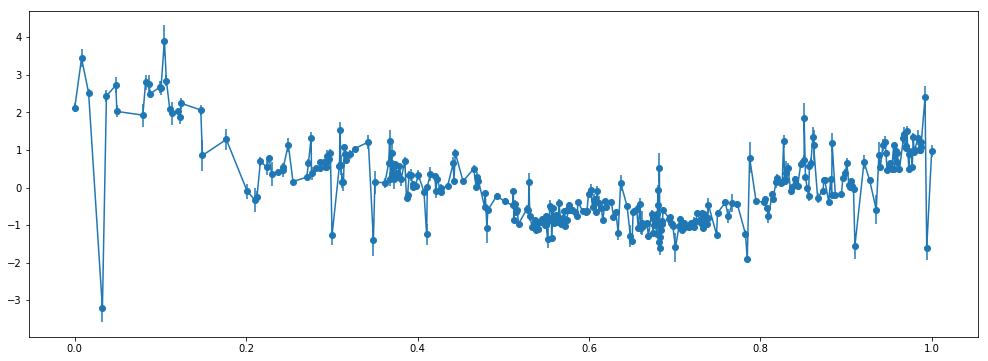

In [28]:
plt.figure(figsize=(17,6))

plt.scatter(normalized['Time'], normalized['Mag'])
plt.errorbar(normalized['Time'], normalized['Mag'], yerr=normalized['Error'])

plt.show()

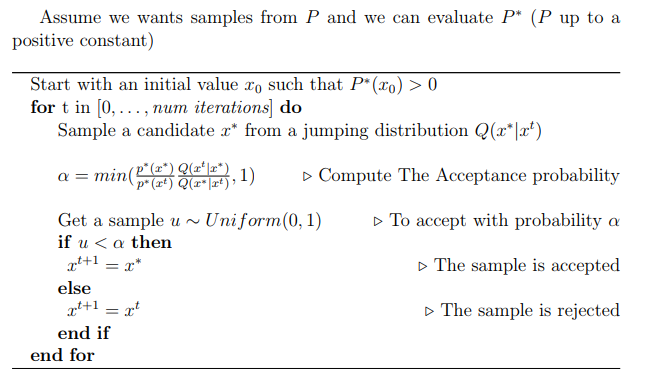

In [ ]:
def metropolis_hastings(n_iterations):
    x = 0.5  # Valor inicial
    for t in range(n_iterations):
        x_star = multivariate_normal.rvs(mean=None, cov=None) # Sample from jumping dist
        
        alpha = min()
        
        u = np.random.uniform(0, 1)
        if u < alpha:
            x = x_star
            
    return x